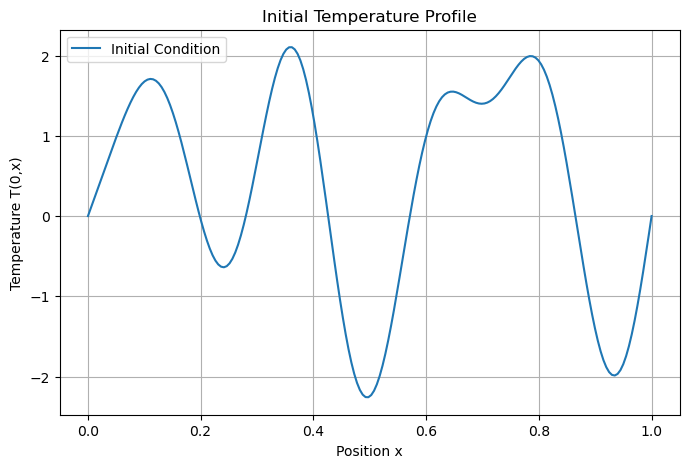

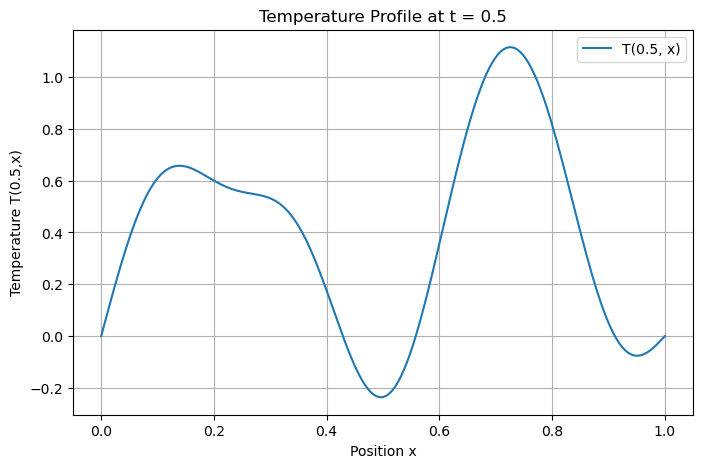

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # Length of the rod
alpha = 0.01    # Thermal diffusivity
N_modes = 10    # Number of sine modes in the initial condition

# Use the specified random generator
rng = np.random.default_rng(42)  # PCG64-based generator with fixed seed

# Generate random Fourier coefficients
c_n = rng.uniform(-1, 1, N_modes)

# Function to compute the initial temperature profile
def initial_temperature(x, L, c_n):
    return sum(c_n[n] * np.sin((n+1) * np.pi * x / L) for n in range(len(c_n)))

# Function to compute the time-evolved temperature profile
def temperature_evolution(x, t, L, alpha, c_n):
    return sum(c_n[n] * np.exp(-alpha * ((n+1) * np.pi / L)**2 * t) * np.sin((n+1) * np.pi * x / L) for n in range(len(c_n)))

# Generate spatial grid
x_vals = np.linspace(0, L, 200)

# Plot the initial temperature profile
plt.figure(figsize=(8, 5))
plt.plot(x_vals, initial_temperature(x_vals, L, c_n), label="Initial Condition")
plt.xlabel("Position x")
plt.ylabel("Temperature T(0,x)")
plt.title("Initial Temperature Profile")
plt.grid()
plt.legend()
plt.show()

# Function to plot temperature at a given time
def plot_temperature_at_time(t):
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, temperature_evolution(x_vals, t, L, alpha, c_n), label=f"T({t}, x)")
    plt.xlabel("Position x")
    plt.ylabel(f"Temperature T({t},x)")
    plt.title(f"Temperature Profile at t = {t}")
    plt.grid()
    plt.legend()
    plt.show()

# Example: Plot the temperature at t = 0.5
plot_temperature_at_time(0.5)
